In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
discrepants = pickle.load(open('host_data/discrepant_host.pkl','rb'))
# list where each corresponds to discrepant case and is another list like [catalog,[zsn,zhost,sn - host]]

In [3]:
nearbys = []
for i in range(len(discrepants)):
    nearbys.append(discrepants[i][0][1])

hosts = []
for i in range(len(discrepants)):
    hosts.append(discrepants[i][0][2])

In [4]:
def case_study(i):
    print('Case {}: '.format(i)+discrepants[i][0][0]['name'],end='\n'*2)
    print('zSN = {}, zHost = {}, (sn - host) = {}'.format(discrepants[i][1][0],discrepants[i][1][1],discrepants[i][1][2]),end='\n'*2)
    print('*'*80)
    print('Nearest',end='\n'*2)
    print(hosts[i][0].mass,'\n')
    print(hosts[i][0].mass[hosts[i][0].redshift_names],end='\n'*2)
    print('Elliptical Radii Away',end='\n'*2)
    print(hosts[i][1],end='\n'*2)

    print('*'*80)
    print('Nearby',end='\n'*2)
    print(nearbys[i].mass)
    print('\n')
    print(nearbys[i].mass[nearbys[i].redshift_names],end='\n'*2)
    print('Elliptical Radii Away')
    for i in hosts[i][2]:
        print(i)
    print('\n')


In [5]:
case_study(0)

Case 0: GND12Col

zSN = 2.238, zHost = 2.1, (sn - host) = 0.1379999999999999

********************************************************************************
Nearest

  id    z    ltau metal lage  Av  lmass lsfr lssfr la2t   chi2  
----- ------ ---- ----- ---- ---- ----- ---- ----- ---- --------
32933 2.1000 8.20 0.020 8.80 1.10 10.56 0.83 -9.73 0.60 7.75e-01 

2.1000

Elliptical Radii Away

1.0640138162012542

********************************************************************************
Nearby

  id    z    ltau metal lage  Av  lmass  lsfr lssfr  la2t   chi2  
----- ------ ---- ----- ---- ---- ----- ----- ------ ---- --------
32616 0.9500 8.20 0.020 8.60 1.20 10.19  1.10  -9.09 0.40 1.32e+01
32933 2.1000 8.20 0.020 8.80 1.10 10.56  0.83  -9.73 0.60 7.75e-01
33037 1.6100 8.80 0.020 9.40 0.70  9.52 -0.76 -10.28 0.60 4.30e-01
33141 0.7700 8.20 0.020 8.80 0.60  8.33 -1.40  -9.73 0.60 5.68e-01


  z   
------
0.9500
2.1000
1.6100
0.7700

Elliptical Radii Away
4.25448603446999
1.0640138

# This first case the nearest is the smallest dz and the percent difference isnt so bad.

# I am guessing the discrepancy is just due to uncertainties in the redshift measurements between the two. No redshift reevaluation necessary

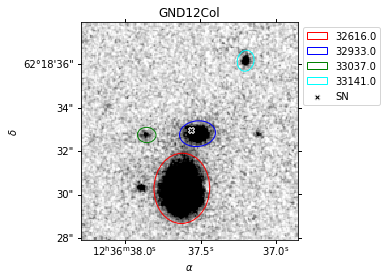

In [6]:
# i for case study; don't need to loop
# Case study 0
# the SN nickname
i = 0
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

# for a  good vmin, vmax zscale using fits; use those vals with linear norm, ie set logscale false
ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min=-.0056,val_max=.0159)


In [7]:
case_study(1)

Case 1: GND12Tom

zSN = 1.14, zHost = 1.26, (sn - host) = -0.1200000000000001

********************************************************************************
Nearest

  id    z    ltau metal lage  Av  lmass lsfr lssfr  la2t   chi2  
----- ------ ---- ----- ---- ---- ----- ---- ------ ---- --------
32162 1.2600 8.60 0.020 9.30 0.90 11.05 0.51 -10.54 0.70 9.49e+00 

1.2600

Elliptical Radii Away

1.9300989340443198

********************************************************************************
Nearby

  id    z     ltau metal lage  Av  lmass  lsfr lssfr   la2t   chi2  
----- ------ ----- ----- ---- ---- ----- ----- ------ ----- --------
32162 1.2600  8.60 0.020 9.30 0.90 11.05  0.51 -10.54  0.70 9.49e+00
32661 2.6600  9.00 0.020 7.60 1.40  8.63  1.10  -7.54 -1.40 8.29e-01
32696 0.6000 10.00 0.020 9.70 0.00  8.16 -1.41  -9.57 -0.30 1.84e+00
32704 1.6500  7.00 0.020 7.90 0.00  7.83 -2.47 -10.30  0.90 2.10e+00


  z   
------
1.2600
2.6600
0.6000
1.6500

Elliptical Radii Away
1.93009893

# Second case similar to first; again the nearest is the smallest dz and the percent difference isnt so bad.

# The discrepancy is just due to uncertainties in the redshift measurements between the two. No redshift reevaluation necessary

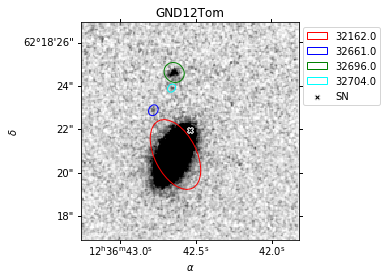

In [8]:
# i for case study; don't need to loop
# Case study 1
# the SN nickname
i = 1
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)


# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))
# for a  good vmin, vmax zscale using fits; use those vals with linear norm, ie set logscale false
ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min=-.0056,val_max=.0159)


In [9]:
case_study(2)

Case 2: GND13Gar

zSN = 1.067, zHost = 0.57, (sn - host) = 0.497

********************************************************************************
Nearest

 id    z    ltau metal lage  Av  lmass  lsfr lssfr  la2t   chi2  
---- ------ ---- ----- ---- ---- ----- ----- ------ ---- --------
8985 0.5700 9.40 0.020 9.90 0.00  8.36 -2.12 -10.48 0.50 8.51e-01 

0.5700

Elliptical Radii Away

0.7686646519304848

********************************************************************************
Nearby

 id    z     ltau metal lage  Av  lmass  lsfr lssfr   la2t   chi2  
---- ------ ----- ----- ---- ---- ----- ----- ------ ----- --------
8889 0.8300  9.40 0.020 9.20 0.00  8.16 -0.99  -9.14 -0.20 9.49e-01
8897 0.9400  9.20 0.020 9.40 0.10  8.29 -1.27  -9.56  0.20 6.27e-01
8958 0.6800  7.60 0.020 8.20 0.10  7.27 -1.90  -9.17  0.60 1.30e+00
8961 1.1300  9.60 0.020 8.80 0.00  7.42 -1.25  -8.67 -0.80 9.15e-01
8963 1.6600  9.00 0.020 9.10 0.00  8.40 -0.80  -9.20  0.10 8.26e-01
8985 0.5700  9.40 0.020 9.90

# This case needs either an update on the host or sn redshift. The disagreement is too large to be due to uncertainties. 

# The best host in terms of redshift would be id8961 at z~1.13 it is 34.8 ell radii away however while there are other options orders of magnidue nearer. Next move to view this image at sn loc and identify which host is which with ell shown. 

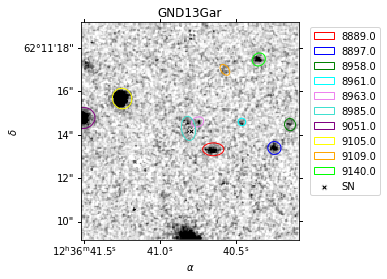

In [10]:
#for i in range(len(candels_Ias)):
# i for case study; don't need to loop
# Case study 2
# the SN nickname
i = 2
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 6 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

# for a  good vmin, vmax zscale using fits; use those vals with linear norm, ie set logscale false
ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min=-.0056,val_max=.0159)


# There isn't really anything  visible  in terms of galaxy at most of these  objects.

# I'd guess that if there actually is a galaxy at 8961 it can't be the host it is too far so the better redshift there won't work.

# The only legit candidates from this are 8985 0.57 and 8963 at 1.66

# Am I normalizing the image incorrectly, using minimum value to maximum value logscaled. Should I not go all the way to maximum?

# The SN is said  to be at 1.0687; I could try and fit this SN to 0.57, 1.66 however as well to see how those fits look?

# Or is there another galaxy behind these that I don't know  about?

In [11]:
case_study(3)

Case 3: GND13Sto

zSN = 1.833, zHost = 0.56, (sn - host) = 1.273

********************************************************************************
Nearest

  id    z    ltau metal lage  Av  lmass lsfr lssfr  la2t   chi2  
----- ------ ---- ----- ---- ---- ----- ---- ------ ---- --------
27567 0.5600 9.60 0.020 9.90 4.00 10.57 0.43 -10.14 0.30 1.32e+01 

0.5600

Elliptical Radii Away

4.475319918325295

********************************************************************************
Nearby

  id    z    ltau metal lage  Av  lmass  lsfr lssfr  la2t   chi2  
----- ------ ---- ----- ---- ---- ----- ----- ------ ---- --------
27444 1.0700 9.00 0.020 9.60 0.60 10.45 -0.02 -10.47 0.60 1.50e+00
27482 0.5600 8.80 0.020 8.80 0.90  9.48  0.62  -8.86 0.00 1.15e+00
27567 0.5600 9.60 0.020 9.90 4.00 10.57  0.43 -10.14 0.30 1.32e+01
27692 1.2600 7.00 0.020 7.90 0.60  8.11 -2.20 -10.30 0.90 1.99e+00
27718 1.2500 7.20 0.020 8.00 0.00  7.85 -1.94  -9.79 0.80 5.12e+00
27826 0.9300 8.40 0.020 8.70 0.00  7

# This case another which needs either an update on the host or sn redshift. The disagreement is too large to be due to uncertainties.

# The best host in terms of redshift would be id27833 at z~1.68 it is 16.6 ell radii away however while there are other options 3~4x closer. Next move to view image around sn location and identify which host is which with the ellipses shown.

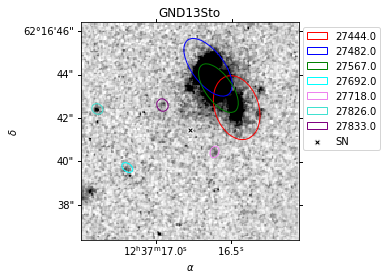

In [12]:
#for i in range(len(candels_Ias)):
# i for case study; don't need to loop
# Case study 3
# the SN nickname
i = 3
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

#print(possible_hosts)
ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min =-.012 ,val_max =.03 )

# Real candidates are  27444@1.07, 27482@0.56, 27567@0.56

# Host said to be 27567 while SN initially measured at 1.833

# Best match would've  been  27833@1.68 but I think seperation too large

In [16]:
case_study(4)

Case 4: GSD10Pri

zSN = 1.545, zHost = 1.688, (sn - host) = -0.14300000000000002

********************************************************************************
Nearest

  Seq     RAdeg      DECdeg    Hmag H_SNR  PhotFlag StarFlag Class_star AGNFlag zbest zspec q_zspec r_zspec zphot zphot_l68 zphot_u68 zphot_l95 zphot_u95  zAGN    M_med       s_med     M_neb_med   s_neb_med  delta_Mz M_2a_tau M_2d_tau M_6a_tau M_10c M_11a_tau M_12a M_13a_tau M_14a M_15a M_6a_tau^NEB M_6a_deltau M_6a_invtau M_10c^dust M_12a_tau M_14a_const M_14a_lin M_14a_deltau M_14a_tau
------- --------- ----------- ----- ------ -------- -------- ---------- ------- ----- ----- ------- ------- ----- --------- --------- --------- --------- ----- ----------- ----------- ----------- ----------- -------- -------- -------- -------- ----- --------- ----- --------- ----- ----- ------------ ----------- ----------- ---------- --------- ----------- --------- ------------ ---------
15591.0 53.158287 -27.7774506 24.35 163.71    

Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-71.6
-71.6
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-46.3
-46.3
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
89.9
89.9
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-62.9
-62.9
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-81.6
-81.6
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
66.1
66.1
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
88.8
88.8
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
75.8
75.8
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-30.6
-30.6
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-83.9
-83.9
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
21.7
21.7


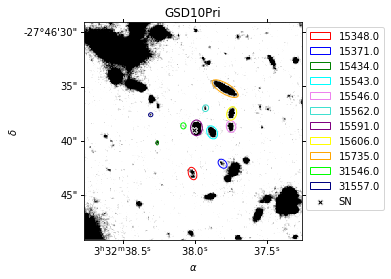

In [11]:
#for i in range(len(candels_Ias)):
# i for case study; don't need to loop
# Case study 4
# the SN nickname
i = 4
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

#print(possible_hosts)
ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = .00098,val_max = .0043 )

In [19]:
case_study(5)

Case 5: GSD11Was

zSN = 1.33, zHost = 0.851, (sn - host) = 0.4790000000000001

********************************************************************************
Nearest

 Seq     RAdeg       DECdeg    Hmag H_SNR PhotFlag StarFlag Class_star AGNFlag zbest zspec q_zspec r_zspec zphot zphot_l68 zphot_u68 zphot_l95 zphot_u95  zAGN    M_med      s_med     M_neb_med  s_neb_med  delta_Mz M_2a_tau M_2d_tau M_6a_tau M_10c M_11a_tau M_12a M_13a_tau M_14a M_15a M_6a_tau^NEB M_6a_deltau M_6a_invtau M_10c^dust M_12a_tau M_14a_const M_14a_lin M_14a_deltau M_14a_tau
------ ---------- ----------- ----- ----- -------- -------- ---------- ------- ----- ----- ------- ------- ----- --------- --------- --------- --------- ----- ----------- ---------- ----------- ---------- -------- -------- -------- -------- ----- --------- ----- --------- ----- ----- ------------ ----------- ----------- ---------- --------- ----------- --------- ------------ ---------
8859.0 53.0869217 -27.8281918 25.25 24.95      0.0     

# This case the second to nearest redshift is in very good agreement with snz, 1.35 and 1.33. 

# I'd guess this is the actual host which we can update the catalog to reflect and leave redshifts unchanged. 

# However should probably show the image around sn loc and host ell identified to see why there is an object so much nearer.

Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-38.5
-38.5
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
71.0
71.0
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-76.8
-76.8
Santini2015; goods-s_candels; https://archive.stsci.edu/prepds/candels/
-81.9
-81.9


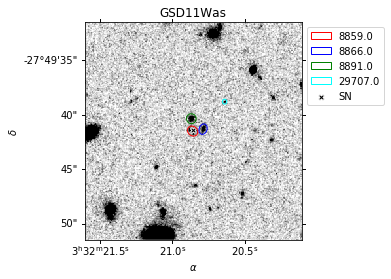

In [12]:
#for i in range(len(candels_Ias)):
# i for case study; don't need to loop
# Case study 3
# the SN nickname
i = 5
nick = discrepants[i][0][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(discrepants[i][0][0]['RA'],discrepants[i][0][0]['DEC'],unit = (u.hourangle,u.deg))

# the nearby to the SN
nearby = discrepants[i][0][1] 
# the host to the SN
host = discrepants[i][0][2]

# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

#print(possible_hosts)
ellipse(nick.lower()+'.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min=-.004,val_max =.0108)